# Exercício - Machine Learning com Scikit-Learn

![Logo de capa](Exercicio-Scikit-Learn-Logo.png)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Desenvolvimento](#development)
    * [2.1.Carregamento dos Dados](#data_load)
    * [2.2.Análise da variável predita](#feature_analysis)
    * [2.3.Análise da variável preditora](#target_analysis)
    * [2.4.Modelo Estatístico](#model)
- [3.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

O projeto é um exercício realizado a partir do exemplo fornecido no capítulo 15 do curso citado em referências.



---
<a id='development'></a>
## 2. Desenvolvimento

Problema de Negócio:
Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#%matplotlib inline

In [3]:
# Altera a exibição de float para quatro casas decimais
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(precision=4)

In [4]:
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [5]:
# Versões das bibliotecas usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sns.__version__)
print('Scikit-Learn versão ' + skl.__version__)

Numpy versão 1.23.5
Pandas versão 2.0.0
Matplotlib versão 3.7.1
Seaborn versão 0.12.2
Scikit-Learn versão 1.2.2


<a id='data_load'></a>
### 2.1 Carregamento dos Dados

In [6]:
# Carrega os dados e exibe as primeiras linhas do dataframe
df = pd.read_csv('dataset.csv')
df.head()

,horas_estudo_mes,salario
0,57.0000,6813.0000
1,48.0000,6855.0000
2,60.0000,5801.0000
3,73.0000,7431.0000
4,46.0000,5475.0000


In [7]:
# Exibe as dimensões do dataframe
df.shape

(500, 2)

In [8]:
# Exibe as informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
# Descreve com estatísticas o  dataframe
df.describe()

,horas_estudo_mes,salario
count,500.0000,500.0000
mean,50.0600,6018.9300
std,14.6594,848.6979
min,1.0000,3664.0000
25%,39.7500,5473.0000
50%,50.0000,6013.5000
75%,60.0000,6542.0000
max,100.0000,9348.0000


In [10]:
# Verifica que não há valores ausentes
assert df.isnull().sum().sum() == 0

<a id='feature_analysis'></a>
### 2.2 Análise da variável predita

In [11]:
# Define y como valor com aluguel
y = df['salario']
y.head()

0   6813.0000
1   6855.0000
2   5801.0000
3   7431.0000
4   5475.0000
Name: salario, dtype: float64

In [12]:
# Descreve y com estatísticas
y.describe()

count    500.0000
mean    6018.9300
std      848.6979
min     3664.0000
25%     5473.0000
50%     6013.5000
75%     6542.0000
max     9348.0000
Name: salario, dtype: float64

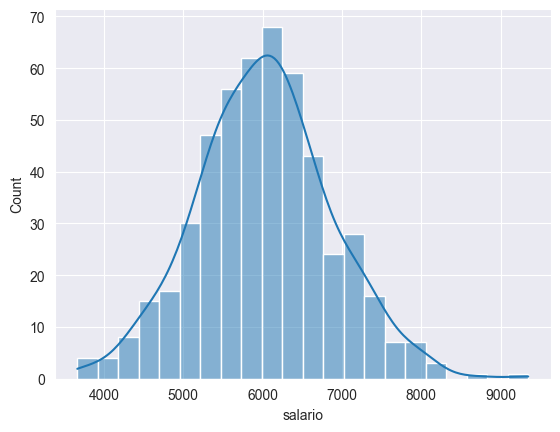

In [13]:
# Plota a distribuição de y
sns.histplot(data = y, kde = True);

<a id='target_analysis'></a>
### 2.3 Análise da variável preditora

In [14]:
# Calcula a correlação das variáveis com y
correlacao = df.corr().loc['salario', 'horas_estudo_mes']
correlacao

0.8185756541894318

In [15]:
# Define X como a variável com maior correlação com valor aluguel (além dela própia)
x = df['horas_estudo_mes']
x.head()

0   57.0000
1   48.0000
2   60.0000
3   73.0000
4   46.0000
Name: horas_estudo_mes, dtype: float64

In [16]:
# Descreve X com estatísticas
x.describe()

count   500.0000
mean     50.0600
std      14.6594
min       1.0000
25%      39.7500
50%      50.0000
75%      60.0000
max     100.0000
Name: horas_estudo_mes, dtype: float64

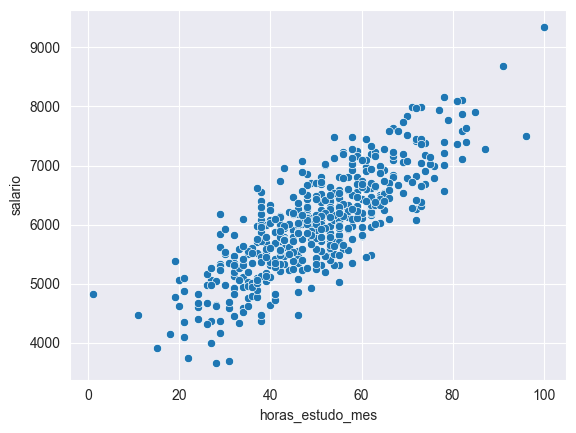

In [17]:
# Plota a distribuição de X e y
sns.scatterplot(x = x, y = y);

<a id='model'></a>
### 2.4 Modelo de Regressão

In [18]:
# Ajusta o shape de X
X = x.values.reshape(-1, 1)

In [19]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Criao modelo
modelo = LinearRegression()

In [21]:
# Treinado modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

In [22]:
# Predição de teste para alguns valores
modelo.predict(np.array([20, 60,80]).reshape(-1, 1))

array([4560.4208, 6487.6949, 7451.3319])

In [23]:
# Função para plotar os pontos e a reta de regressão
def plotar_pontos_regressao(X, eixo_x, y, eixo_y, y_pred):
    plt.figure(figsize = (10, 6))
    plt.xlabel(eixo_x, size = 16)
    plt.ylabel(eixo_y, size = 16)
    plt.plot(x, y, "o", label = "Dados Reais")
    plt.plot(x, y_pred, "r-", label = "Reta de Regressão (Previsões do Modelo)")
    plt.legend(loc = "best")
    plt.show()

In [24]:
# Calcula os valores de y preditos pelo modelo
y_pred = modelo.predict(X)

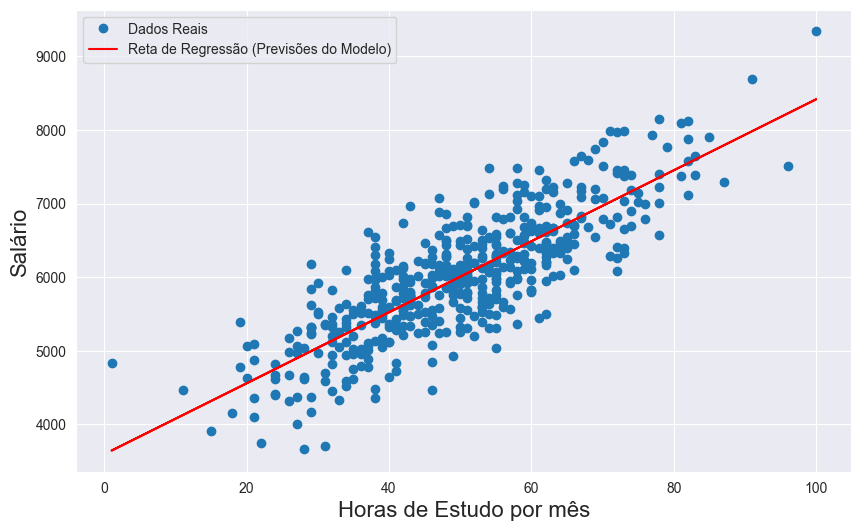

In [25]:
# Plota os pontos e a reta de regressão
plotar_pontos_regressao(X=x, eixo_x='Horas de Estudo por mês', y=y, eixo_y='Salário', y_pred=y_pred)

In [26]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [27]:
# Coeficiente linear - Intercepto
modelo.intercept_

3596.783724372753

In [28]:
# Coeficiente angular - Slope
modelo.coef_[0]

48.18185277143636

O modelo de regressão linear simples criado pode ser representado por:

$$Y=48.1819X+3596.7837$$

,onde Y é o salário, e X é a quantidade de horas de estudo por mês.

---
<a id='conclusion'></a>
## 3. Conclusão

Pelo valor obtido de 0.59 para R2, conclui-se que o modelo de regressão linear simples que usa a quantidade de horas de estudo por mês para prever o valor do salário usando este conjunto de dados gerou resultados razoavelmente satisfatórios para resolver este problema de negócio.

A biblioteca Scikit-Learn, assim como o Statsmodels, se provou bem simples e eficiente para treinar um modelo de regressão linear simples, e é mais recomendada para criação de modelos de machine learning que serão colocados em produção..

---
<a id='references'></a>
## Referências

Data Science Academy - Fundamentos de Linguagem Python Para Análise de Dados e Data Science: https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science ,
Acessado em 29/05/2023.